# Evaluación Preliminar del Conjunto de Datos: Microsoft Security Incident Prediction

Este notebook presenta un análisis básico del conjunto de datos `Microsoft.csv`. En esta evaluación preliminar, se describe el conjunto de datos, se identifica la variable objetivo y el tipo de problema, y se visualizan las relaciones entre las variables. También se incluyen la detección de posibles problemas con los datos y la matriz de correlación para evaluar interdependencias.

In [1]:
!pip install kagglehub --quiet

In [8]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Vamos a utilizar el import directamente de Kaggle
file_path = kagglehub.dataset_download("Microsoft/microsoft-security-incident-prediction")
#print("Path to dataset files:", file_path)

A continuación, procederemos a obtener los datos. En primer lugar, destacar que en el dataset original existen dos tipos de archivos: train y test. Dado que estos datasets son muy grandes, vamos a particionarlos y tomar una muestra de ellos. Para lograr esto, el conjunto en chunks (bloques) y seleccionaremos una muestra aleatoria de a lo largo del archivo. En este caso, tomaremos la muestra inicial del archivo GUIDE_TEST.

In [9]:
file_path = os.path.join(file_path, "GUIDE_Test.csv")  

# Cargamos el dataset para ver su tamaño sin cargar todo en memoria
file_size_gb = os.path.getsize(file_path) / (1024 ** 3)

# Leemos el archivo en bloques y tomamos una muestra aleatoria para reducir el tamaño
chunk_size = 10**5  # Definimos el tamaño de los chunks
sample_frac = 0.001   # Fracción de datos que queremos conservar

dtype_adjustments = {
    'Id': 'int32', 'OrgId': 'int32', 'IncidentId': 'int32', 'AlertId': 'int32', 'DeviceId': 'int32',
    'Sha256': 'string', 'IpAddress': 'string', 'AccountSid': 'string', 'AccountUpn': 'string',
    'AccountObjectId': 'string', 'AccountName': 'string', 'DeviceName': 'string', 'NetworkMessageId': 'string',
    'EmailClusterId': 'float32', 'RegistryKey': 'string', 'RegistryValueName': 'string', 'RegistryValueData': 'string',
    'ApplicationId': 'string', 'ApplicationName': 'string', 'OAuthApplicationId': 'string', 'FileName': 'string',
    'FolderPath': 'string', 'ResourceIdName': 'string', 'CountryCode': 'int32', 'State': 'int32', 'City': 'int32',
    'IncidentGrade': 'category', 'ActionGrouped': 'category', 'ActionGranular': 'category', 'EntityType': 'category',
    'EvidenceRole': 'category', 'ThreatFamily': 'category', 'ResourceType': 'category', 'Roles': 'category',
    'AntispamDirection': 'category', 'SuspicionLevel': 'category', 'LastVerdict': 'category', 'Usage': 'category'
}

# Lista para almacenar los chunks seleccionados
chunks = []

for chunk in pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_adjustments, parse_dates=['Timestamp']):
    chunks.append(chunk.sample(frac=sample_frac))

# Concatenamos los chunks seleccionados en un único DataFrame
reduced_df = pd.concat(chunks, ignore_index=True)


In [11]:
# Calculamos el tamaño en memoria del DataFrame reducido
memory_usage_mb = reduced_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"El tamaño en memoria del dataset reducido es de: {memory_usage_mb:.2f} MB")


El tamaño en memoria del dataset reducido es de: 6.03 MB


In [12]:
#Guardar el dataset reducido
current_directory = os.getcwd()
reduced_file_path = os.path.join(current_directory, 'microsoft_Reduced.csv')
# Guardamos el DataFrame reducido en un archivo CSV
reduced_df.to_csv(reduced_file_path, index=False)

#print(f"El dataset reducido ha sido guardado en {reduced_file_path}")

### Descripción del conjunto de datos


In [13]:
reduced_df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1647,7,3625,828,2024-05-24 18:15:03+00:00,21,70,Impact,NaN,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
1,1738,0,133,815276,2024-06-09 19:37:51+00:00,0,0,InitialAccess,T1078;T1078.004,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
2,3545,35,210,1182321,2024-06-11 08:12:07+00:00,7,6,InitialAccess,NaN,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
3,4988,676,61698,1507135,2024-06-11 14:25:05+00:00,35,23,InitialAccess,T1566,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,3403,2,11371,3648,2024-06-04 12:03:07+00:00,15,13,Exfiltration,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [14]:
print("describe")
reduced_df.describe(include="all").T

describe


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Id,4148.0,NaN,NaN,NaN,2558.473963,0.0,1634.0,2246.0,3815.25,5332.0,1425.266518
OrgId,4148.0,NaN,NaN,NaN,168.732401,0.0,8.0,44.0,164.0,4153.0,343.346612
IncidentId,4148.0,NaN,NaN,NaN,65450.383317,3.0,408.0,8103.5,74190.25,595410.0,115269.097896
AlertId,4148.0,NaN,NaN,NaN,405166.659595,0.0,23112.5,225519.0,665200.75,1713809.0,455740.684888
Timestamp,4148,NaN,NaN,NaN,2024-06-07 07:04:27.779894016+00:00,2024-01-08 19:20:19+00:00,2024-06-04 10:34:28.500000+00:00,2024-06-07 09:34:51+00:00,2024-06-11 15:18:50+00:00,2024-06-17 05:55:14+00:00,NaN
DetectorId,4148.0,NaN,NaN,NaN,98.514465,0.0,2.0,8.0,40.0,7644.0,376.923255
AlertTitle,4148.0,NaN,NaN,NaN,2535.54918,0.0,2.0,9.5,135.0,112774.0,10496.432219
Category,4148,16,InitialAccess,1914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MitreTechniques,1817,115,T1078;T1078.004,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IncidentGrade,4148,3,BenignPositive,1764,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Obtener el tipo de cada variable
variable_types = reduced_df.dtypes
print("Tipos de cada variable:")
print(variable_types)


Tipos de cada variable:
Id                                  int32
OrgId                               int32
IncidentId                          int32
AlertId                             int32
Timestamp             datetime64[ns, UTC]
DetectorId                          int64
AlertTitle                          int64
Category                           object
MitreTechniques                    object
IncidentGrade                    category
ActionGrouped                    category
ActionGranular                     object
EntityType                         object
EvidenceRole                     category
DeviceId                            int32
Sha256                     string[python]
IpAddress                  string[python]
Url                                 int64
AccountSid                 string[python]
AccountUpn                 string[python]
AccountObjectId            string[python]
AccountName                string[python]
DeviceName                 string[python]
NetworkMes

In [18]:
# Verificar valores faltantes en cada columna
missing_values = reduced_df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
Id                       0
OrgId                    0
IncidentId               0
AlertId                  0
Timestamp                0
DetectorId               0
AlertTitle               0
Category                 0
MitreTechniques       2331
IncidentGrade            0
ActionGrouped         4146
ActionGranular        4146
EntityType               0
EvidenceRole             0
DeviceId                 0
Sha256                   0
IpAddress                0
Url                      0
AccountSid               0
AccountUpn               0
AccountObjectId          0
AccountName              0
DeviceName               0
NetworkMessageId         0
EmailClusterId        4104
RegistryKey              0
RegistryValueName        0
RegistryValueData        0
ApplicationId            0
ApplicationName          0
OAuthApplicationId       0
ThreatFamily          4120
FileName                 0
FolderPath               0
ResourceIdName           0
ResourceType          41

### Descripción del conjunto de datos

El dataset GUIDE de Microsoft está orientado a predecir la calificación de triage de incidentes de ciberseguridad en tres clases: **True Positive (TP)**, **Benign Positive (BP)** y **False Positive (FP)**, lo cual lo define como un problema de clasificación. 

Var objetivo : IncidentGrade

In [19]:
print(reduced_df.shape)

(4148, 46)


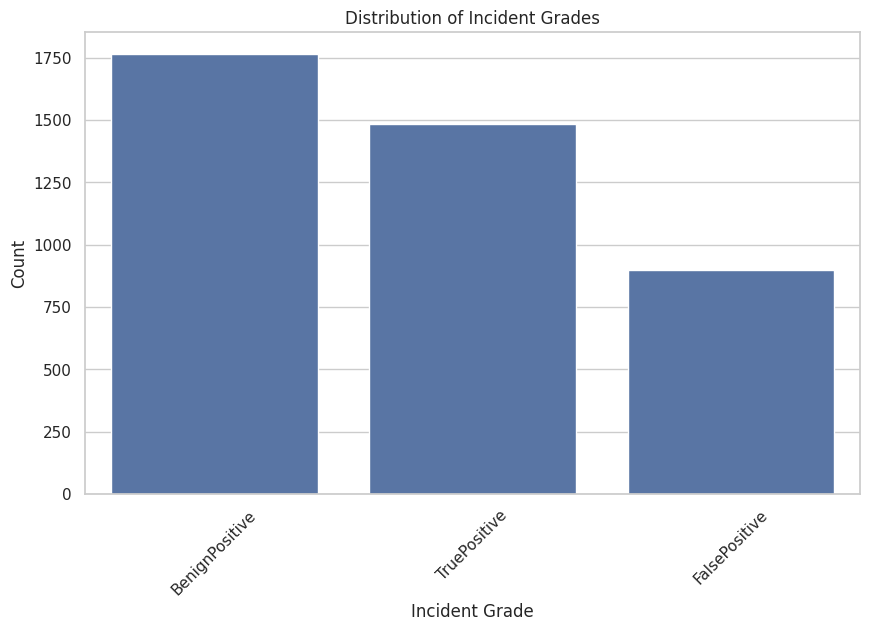

In [20]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Count plot for the IncidentGrade
plt.figure(figsize=(10, 6))
sns.countplot(data=reduced_df, x='IncidentGrade', order=reduced_df['IncidentGrade'].value_counts().index)
plt.title('Distribution of Incident Grades')
plt.xlabel('Incident Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Matriz de correlación de las variables

Se calcula y visualiza la matriz de correlación para analizar la relación entre variables numéricas. Esto ayuda a detectar posibles multicolinealidades y elegir características relevantes.


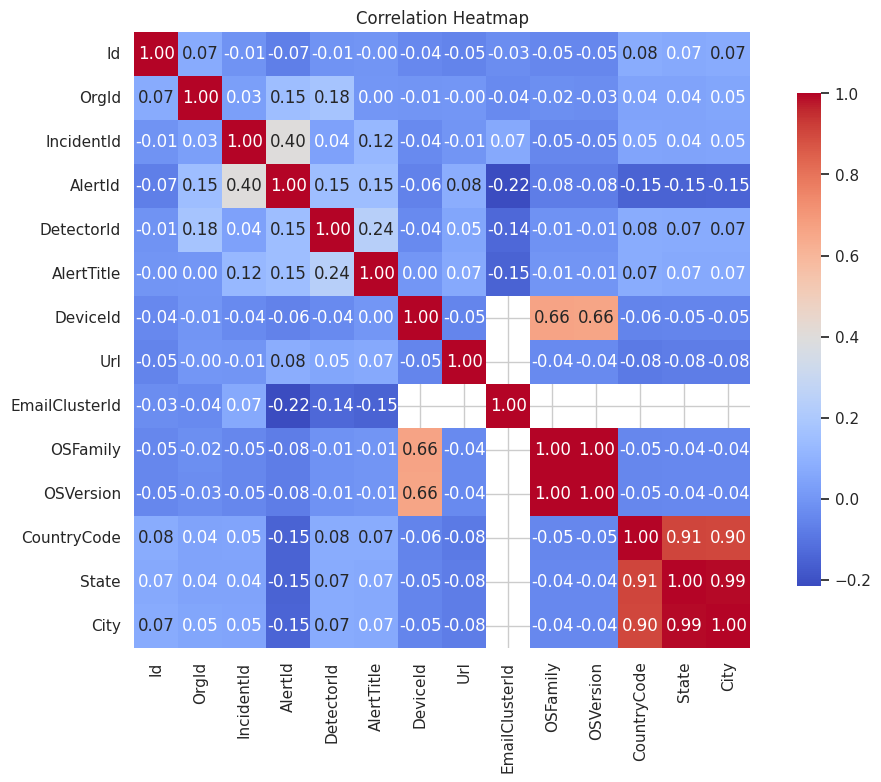

In [21]:
numeric_df = reduced_df.select_dtypes(include=['float32', 'int32','int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
# Seleccionamos solo las columnas numéricas
correlation_matrix = reduced_df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


Dado que es un ejemplo de clasificacion, intentar trazar una regresion sobre la variable objetivo (categorica) es complicado